In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
train_df = pd.read_csv(r"/home/nisarg/Downloads/Gujarati_News_Dataset/train.csv")
test_df = pd.read_csv(r"/home/nisarg/Downloads/Gujarati_News_Dataset/valid.csv")

In [150]:
train_df

,headline,label
0,મોદી સરકાર 1 ફેબ્રુઆરીએ વચગાળાનું બજેટ રજૂ કરશ...,business
1,LIC પોલિસી ધારકો માટે મોટી ખબર! પ્રીમિયમ જમા ક...,business
2,"VIRAL VIDEO: મસ્તમૌલા અંદાજમાં રણવીર સિંહ, ચાર...",entertainment
3,શાહરૂખની સાથે ફિલ્મમાં કામ કરી ચુક્યો છે અનુષ્...,entertainment
4,એકદમ બટરફ્લાઇ અવતારમાં જોવા મળી આ એક્ટ્રેસ,entertainment
...,...,...
5264,મીડિયા દિગ્ગજ રૂપર્ટ મર્ડોકે પણ PM મોદીના ભરપે...,business
5265,"74 સુધી રૂપિયો ગગડ્યો તો'ય પિયુષ ગોયલ બોલ્યા, ...",business
5266,"મનીષ મલ્હોત્રાએ રજૂ કર્યું સમર કલેકશન, જુઓ Pics",entertainment
5267,"રેલવેમાં બદલાયો ટિકિટનો નિયમ, અડધી ટિકિટ પર બા...",business


(array([1840.,    0.,    0.,    0.,    0., 2321.,    0.,    0.,    0.,
        1108.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

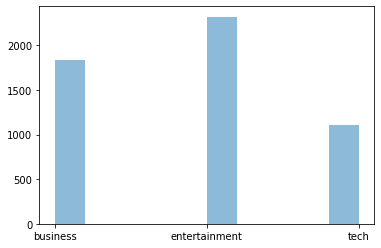

In [151]:
plt.hist(train_df.label.values, alpha = 0.5)

(array([491.,   0.,   0.,   0.,   0., 584.,   0.,   0.,   0., 243.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

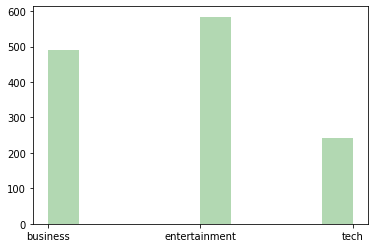

In [152]:
plt.hist(test_df.label.values, color='green', alpha = 0.3)

In [153]:
train_df['label'] = train_df['label'].replace('business', 0)
train_df['label'] = train_df['label'].replace('entertainment', 1)
train_df['label'] = train_df['label'].replace('tech', 2)

In [154]:
test_df['label'] = test_df['label'].replace('business', 0)
test_df['label'] = test_df['label'].replace('entertainment', 1)
test_df['label'] = test_df['label'].replace('tech', 2)

In [155]:
import tensorflow as tf

In [156]:
tf.__version__

'2.4.0'

In [157]:
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot 

In [158]:
X = train_df['headline']
X_test = test_df['headline']
y = train_df['label']
y_test = test_df['label']
y_test_ = test_df['label']

In [159]:
voc_size = 5000
messages = X.copy()
messages_test = X_test.copy()

In [160]:
import re
import nltk

In [161]:
guj_stop_words = open("/home/nisarg/Downloads/Gujarati_Stop_Words.txt").readlines()


In [162]:
guj_stop_words

['અથવા \n',
 'અને \n',
 'અમને\n',
 'અમારું \n',
 'અમે \n',
 'અહીં \n',
 'આ \n',
 'આગળ \n',
 'આથી \n',
 'આનું \n',
 'આને \n',
 'આપણને \n',
 'આપણું \n',
 'આપણે \n',
 'આપી \n',
 'આવી \n',
 'આવે \n',
 'ઉપર \n',
 'ઊંચે \n',
 'ઊભું \n',
 'એ \n',
 'એક \n',
 'એના \n',
 'એનાં \n',
 'એની \n',
 'એનું \n',
 'એને \n',
 'એનો \n',
 'એમ \n',
 'એવા \n',
 'એવાં \n',
 'એવી \n',
 'એવું \n',
 'એવો \n',
 'ઓછું \n',
 'અંગે \n',
 'અંદર \n',
 'કઈ \n',
 'કયું \n',
 'કયો \n',
 'કરવું \n',
 'કરતાં \n',
 'કરી \n',
 'કરીએ \n',
 'કરું \n',
 'કરે \n',
 'કરેલું \n',
 'કર્યા \n',
 'કર્યાં \n',
 'કર્યું \n',
 'કર્યો \n',
 'કંઈક \n',
 'કાંઈ \n',
 'કે \n',
 'કેટલું \n',
 'કેમ \n',
 'કેવી \n',
 'કેવું \n',
 'કોઈ \n',
 'કોઈક \n',
 'કોણ \n',
 'કોણે \n',
 'કોને \n',
 'ક્યારે \n',
 'ક્યાં \n',
 'ખૂબ \n',
 'ગઈ \n',
 'ગયા \n',
 'ગયાં \n',
 'ગયું \n',
 'ગયો \n',
 'ઘણું \n',
 'છ \n',
 'છતાં\n',
 'છીએ \n',
 'છું \n',
 'છે\n',
 'છેક\n',
 'છો \n',
 'જ\n',
 'જાય  \n',
 'જી \n',
 'જે \n',
 'જેટલું \n',
 'જેને\n',
 'જેમ \n',
 'જેવી \n',

In [163]:
for i in range(len(guj_stop_words)):
    guj_stop_words[i] = guj_stop_words[i][:-3]

In [164]:
guj_stop_words

['અથવ',
 'અન',
 'અમ',
 'અમારુ',
 'અમ',
 'અહી',
 '',
 'આગ',
 'આથ',
 'આનુ',
 'આન',
 'આપણન',
 'આપણુ',
 'આપણ',
 'આપ',
 'આવ',
 'આવ',
 'ઉપ',
 'ઊંચ',
 'ઊભુ',
 '',
 'એ',
 'એન',
 'એના',
 'એન',
 'એનુ',
 'એન',
 'એન',
 'એ',
 'એવ',
 'એવા',
 'એવ',
 'એવુ',
 'એવ',
 'ઓછુ',
 'અંગ',
 'અંદ',
 'ક',
 'કયુ',
 'કય',
 'કરવુ',
 'કરતા',
 'કર',
 'કરી',
 'કરુ',
 'કર',
 'કરેલુ',
 'કર્ય',
 'કર્યા',
 'કર્યુ',
 'કર્ય',
 'કંઈ',
 'કાં',
 'ક',
 'કેટલુ',
 'કે',
 'કેવ',
 'કેવુ',
 'કો',
 'કોઈ',
 'કો',
 'કોણ',
 'કોન',
 'ક્યાર',
 'ક્યા',
 'ખૂ',
 'ગ',
 'ગય',
 'ગયા',
 'ગયુ',
 'ગય',
 'ઘણુ',
 '',
 'છત',
 'છી',
 'છુ',
 '',
 'છ',
 'છ',
 '',
 'જાય',
 'જ',
 'જ',
 'જેટલુ',
 'જે',
 'જે',
 'જેવ',
 'જેવુ',
 'જેવ',
 'જ',
 'જો',
 'જ્યા',
 'જ્યા',
 'ઝાઝુ',
 'તન',
 'તમન',
 'તમારુ',
 'તમ',
 'તારાથ',
 'તારામ',
 'તારુ',
 'તુ',
 'ત',
 'તે',
 'તેથ',
 'તેણ',
 'તેન',
 'તેન',
 'તેનુ',
 'તેન',
 'તે',
 'તેમનુ',
 'તેમન',
 'તેવ',
 'તેવુ',
 'તે',
 'ત',
 'ત્યાર',
 'ત્ય',
 '',
 'થઈએ ',
 'થત',
 'થત',
 'થત',
 'થત',
 'થ',
 'થય',
 'થયા',
 'થયુ',
 'થય',
 'થયેલ'

In [191]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
    review = messages[i]
    print("Review1", review)
    review = review.split()
    print("review2", review)
    review = [ps.stem(word) for word in review if word not in guj_stop_words]
    review = ' '.join(review)
    corpus.append(review)

Review1 મોદી સરકાર 1 ફેબ્રુઆરીએ વચગાળાનું બજેટ રજૂ કરશે, આ જાહેરાતો થઈ શકે
review2 ['મોદી', 'સરકાર', '1', 'ફેબ્રુઆરીએ', 'વચગાળાનું', 'બજેટ', 'રજૂ', 'કરશે,', 'આ', 'જાહેરાતો', 'થઈ', 'શકે']
Review1 LIC પોલિસી ધારકો માટે મોટી ખબર! પ્રીમિયમ જમા કરવાનો નિયમ બદલાયો
review2 ['LIC', 'પોલિસી', 'ધારકો', 'માટે', 'મોટી', 'ખબર!', 'પ્રીમિયમ', 'જમા', 'કરવાનો', 'નિયમ', 'બદલાયો']
Review1 VIRAL VIDEO: મસ્તમૌલા અંદાજમાં રણવીર સિંહ, ચાર્લી ચૈપલિનને આ રીતે આપ્યું ટ્રીબ્યુટ
review2 ['VIRAL', 'VIDEO:', 'મસ્તમૌલા', 'અંદાજમાં', 'રણવીર', 'સિંહ,', 'ચાર્લી', 'ચૈપલિનને', 'આ', 'રીતે', 'આપ્યું', 'ટ્રીબ્યુટ']
Review1 શાહરૂખની સાથે ફિલ્મમાં કામ કરી ચુક્યો છે અનુષ્કાથી ઠપકો ખાધેલો વ્યક્તિ
review2 ['શાહરૂખની', 'સાથે', 'ફિલ્મમાં', 'કામ', 'કરી', 'ચુક્યો', 'છે', 'અનુષ્કાથી', 'ઠપકો', 'ખાધેલો', 'વ્યક્તિ']
Review1 એકદમ બટરફ્લાઇ અવતારમાં જોવા મળી આ એક્ટ્રેસ
review2 ['એકદમ', 'બટરફ્લાઇ', 'અવતારમાં', 'જોવા', 'મળી', 'આ', 'એક્ટ્રેસ']
Review1 આજે અહીથી ખરીદો OnePlus 6, મળશે 25,000 રૂપિયા સુધીનો ફાયદો
review2 ['આજે', 'અહીથી', 'ખરીદો',

In [192]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus_test = []
for i in range(len(messages_test)):
    review_test = messages_test[i]
    print("Review1", review_test)
    review_test = review_test.split()
    print("review2", review_test)
    review_test = [ps.stem(word) for word in review_test if word not in guj_stop_words]
    review_test = ' '.join(review_test)
    corpus_test.append(review_test)

Review1 IT ડિપાર્ટમેન્ટ 1 લાખ લોકો સામે કરશે દંડનાત્મક કાર્યવાહી
review2 ['IT', 'ડિપાર્ટમેન્ટ', '1', 'લાખ', 'લોકો', 'સામે', 'કરશે', 'દંડનાત્મક', 'કાર્યવાહી']
Review1 વિરાટની સેન્ચુરી પર અનુષ્કા ખુશ, ઇન્સ્ટાગ્રામ પર આવી રીતે વરસાવ્યો પ્રેમ
review2 ['વિરાટની', 'સેન્ચુરી', 'પર', 'અનુષ્કા', 'ખુશ,', 'ઇન્સ્ટાગ્રામ', 'પર', 'આવી', 'રીતે', 'વરસાવ્યો', 'પ્રેમ']
Review1 'જમાઇ રાજા' ની આ હોટ એકટ્રેસના બિકિની ફોટાએ લગાવી 'આગ'
review2 ["'જમાઇ", "રાજા'", 'ની', 'આ', 'હોટ', 'એકટ્રેસના', 'બિકિની', 'ફોટાએ', 'લગાવી', "'આગ'"]
Review1 કરીનાએ સૈફના બર્થડે પર રાખી સ્પેશિયલ પાર્ટી, જુઓ ફોટા
review2 ['કરીનાએ', 'સૈફના', 'બર્થડે', 'પર', 'રાખી', 'સ્પેશિયલ', 'પાર્ટી,', 'જુઓ', 'ફોટા']
Review1 ભારતમાં નોકરી કરવા માટે બેસ્ટ છે આ કંપની, શું તમે પણ તેમા કામ કરવા માંગો છો?
review2 ['ભારતમાં', 'નોકરી', 'કરવા', 'માટે', 'બેસ્ટ', 'છે', 'આ', 'કંપની,', 'શું', 'તમે', 'પણ', 'તેમા', 'કામ', 'કરવા', 'માંગો', 'છો?']
Review1 સંસદિય સમિતિ સમક્ષ રજૂ થયા ઉર્જિત પટેલ, કહ્યું- નોટબંધીનો પ્રભાવ ક્ષણિક હતો
review2 ['સંસદિય', 'સમિતિ', 'સમક્ષ

In [193]:
corpus_test

['it ડિપાર્ટમેન્ટ 1 લાખ લોકો સામે કરશે દંડનાત્મક કાર્યવાહી',
 'વિરાટની સેન્ચુરી પર અનુષ્કા ખુશ, ઇન્સ્ટાગ્રામ પર આવી રીતે વરસાવ્યો પ્રેમ',
 "'જમાઇ રાજા' ની આ હોટ એકટ્રેસના બિકિની ફોટાએ લગાવી 'આગ'",
 'કરીનાએ સૈફના બર્થડે પર રાખી સ્પેશિયલ પાર્ટી, જુઓ ફોટા',
 'ભારતમાં નોકરી કરવા માટે બેસ્ટ છે આ કંપની, શું તમે પણ તેમા કામ કરવા માંગો છો?',
 'સંસદિય સમિતિ સમક્ષ રજૂ ઉર્જિત પટેલ, કહ્યું- નોટબંધીનો પ્રભાવ ક્ષણિક હતો',
 'હવે whatsappથી મોકલી શકશો પૈસા, ટૂંક સમયમાં શરૂ થશે આ સેવા',
 'અહીં 1500 રૂપિયામાં ખાતું ખોલાવો અને fd વધું વ્યાજ મેળવો',
 'હવે આવ્યું બેટરીથી ચાલતું ક્રેડિટ કાર્ડ, બટન પણ હશે, જાણો ખાસિયત',
 'શું તમે જાણો છો બોલિવૂડના આ સ્ટાર્સ રિયલ લાઇફમાં હતાં teacher',
 'nokiaના આ સ્માર્ટફોન પર મળી રહ્યું છે 100%નું કેશબેક',
 'બિગ બોસની ex સ્પર્ધકે શેર બ્લેક બિકિનીમાં તસવીરો',
 'હવે રેલ સફર થશે સરળ, રેલવે આપવા જઈ રહ્યું છે મોટી ભેટ',
 'રિઝર્વ બેન્કના નવા ગર્વનર તરીકે શક્તિકાંત દાસની નિમણૂક',
 'video: ઇશા અંબાણી સાથે શ્લોકા મેહતાએ કર્યો ઘૂમર ડાન્સ',
 'સલમાન ખાને પોતાના બર્થ ડે પર કેમ પહેર્યું 

In [194]:
one_hot_repr = [one_hot(words, voc_size) for words in corpus]
sent_len = 20
embedded_docs = pad_sequences(one_hot_repr, padding = 'pre', maxlen= sent_len)

In [195]:
one_hot_repr_test = [one_hot(words, voc_size) for words in corpus_test]
sent_len = 20
embedded_docs_test = pad_sequences(one_hot_repr_test, padding = 'pre', maxlen= sent_len)

In [196]:
embedded_docs_test

array([[   0,    0,    0, ..., 3491, 1659, 2226],
       [   0,    0,    0, ..., 2231, 2651, 1728],
       [   0,    0,    0, ..., 4815, 4789, 3226],
       ...,
       [   0,    0,    0, ..., 2594, 3916, 4838],
       [   0,    0,    0, ..., 4651, 2454,  318],
       [   0,    0,    0, ..., 2365, 4669, 1404]], dtype=int32)

In [206]:
embedded_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size, embedded_vector_feature, input_length=sent_len))
model.add(LSTM(100))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 99        
Total params: 259,731
Trainable params: 259,731
Non-trainable params: 0
_________________________________________________________________


In [207]:
X = embedded_docs
y = pd.get_dummies(y)
X_test = embedded_docs_test
y_test = pd.get_dummies(y_test)

In [208]:
y_test

,0,1,2
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
1313,0,0,1
1314,0,1,0
1315,1,0,0
1316,0,0,1


In [209]:
model.fit(X, y, epochs = 10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
83/83 [==============================] - 3s 17ms/step - loss: 1.0081 - accuracy: 0.4796 - val_loss: 0.6040 - val_accuracy: 0.7215
Epoch 2/10
83/83 [==============================] - 1s 12ms/step - loss: 0.4557 - accuracy: 0.7808 - val_loss: 0.4706 - val_accuracy: 0.8149
Epoch 3/10
83/83 [==============================] - 1s 12ms/step - loss: 0.2090 - accuracy: 0.9285 - val_loss: 0.5237 - val_accuracy: 0.8126
Epoch 4/10
83/83 [==============================] - 1s 12ms/step - loss: 0.1138 - accuracy: 0.9645 - val_loss: 0.8759 - val_accuracy: 0.8012
Epoch 5/10
83/83 [==============================] - 1s 12ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.8106 - val_accuracy: 0.8111
Epoch 6/10
83/83 [==============================] - 1s 13ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.8054 - val_accuracy: 0.8096
Epoch 7/10
83/83 [==============================] - 1s 13ms/step - loss: 0.0171 - accuracy: 0.9970 - val_loss: 0.9325 - val_accuracy: 0.8005
Epoch 8/10
83

In [205]:
y_pred = model.predict(X_test)

In [176]:
y_pred

array([[9.7471821e-01, 1.4477230e-02, 1.0804607e-02],
       [1.3552061e-01, 6.8554199e-01, 1.7893736e-01],
       [3.9672988e-05, 9.9993324e-01, 2.7043174e-05],
       ...,
       [9.9987674e-01, 7.6597426e-05, 4.6632162e-05],
       [7.5625941e-02, 3.4340055e-04, 9.2403066e-01],
       [2.7984167e-02, 3.1945336e-04, 9.7169638e-01]], dtype=float32)

In [177]:
y_pred_ = []
for i in range(len(y_pred)):
    max_ = max(y_pred[i])
    y_pred_.append(max_)

In [178]:
np.array(y_pred_)

array([0.9747182 , 0.685542  , 0.99993324, ..., 0.99987674, 0.92403066,
       0.9716964 ], dtype=float32)

In [179]:
np.array(y_test_)

array([0, 1, 1, ..., 0, 2, 0])

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test_), y_pred_)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [210]:
simple_test = ["કરીનાએ સૈફના બર્થડે પર રાખી સ્પેશિયલ પાર્ટી, જુઓ ફોટા"]
pred1 = model.predict(simple_test)
pred1

UnimplementedError:  Cast string to float is not supported
	 [[node sequential_13/Cast (defined at <ipython-input-210-90a6fdc380b9>:2) ]] [Op:__inference_predict_function_76780]

Function call stack:
predict_function
